In [ ]:
'''
    Author
        Kevin Roitero
        roitero.kevin@spes.uniud.it
        RMIT -- 17 MAY 2018
'''

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
sns.set_style("whitegrid")

Resources:
- ipython notebook: https://protect-au.mimecast.com/s/Sfc0CgZor6sn0BEghoyozG?domain=ipython.org
- anaconda: https://protect-au.mimecast.com/s/1SYcCjZrxLsk5Oo6f5uWHx?domain=anaconda.org
- Seaborn: https://protect-au.mimecast.com/s/tEzwCk8vyDuZWw2LT9fq9d?domain=seaborn.pydata.org

- R vs Python:
    - https://protect-au.mimecast.com/s/aUvNClxwzDcDnMR9f196AL?domain=qz.com
    - https://protect-au.mimecast.com/s/ObmuCmOxAGhGJMy0CDpGJZ?domain=datacamp.com
    
- ipython notebook extensions (Never Used that but maybe it is useful for you): https://protect-au.mimecast.com/s/ICgtCnxyB8cQOW9yipkVd_?domain=github.com

### Magic Command

Magic:
- "run" for run a file
- "!" for run terminal

In [4]:
! echo "hello!, I'm opening a file from the terminal..."
! open "../MOD/DSC_0418-1.jpg"

hello!, I'm opening a file from the terminal...


### Magic cells

In [5]:
%%script python3
import sys
print('hello from Python: %s' % sys.version)

hello from Python: 3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [6]:
%%bash
echo "hello from $BASH"

hello from /bin/bash


In [201]:
%%bash --out output --err error
echo "hi, stdout"
echo "hello, stderr" >&2

In [202]:
print('output: {}'.format(output))
print('Error: {}'.format(error))

output: hi, stdout

Error: hello, stderr



### background stuff

In [9]:
%%ruby --bg --out ruby_lines
for n in 1...3
    sleep 5
    puts "line #{n}"
    STDOUT.flush
end

Starting job # 2 in a separate thread.


In [10]:
print(ruby_lines.read())

b'line 1\nline 2\n'


### I work with Latex as well: Maxwell's Equations

\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{align}


In [11]:
import multiprocessing

def worker(num):
    """thread worker function"""
    print ('Worker:', num)
    return 

jobs = []
for i in range(5):
    p = multiprocessing.Process(target=worker, args=(i,))
    jobs.append(p)
    p.start()

Worker: 0
Worker: 1
Worker: 2
Worker: 3
Worker: 4


In [12]:
import multiprocessing


def worker(procnum, return_dict):
    '''worker function'''
    print( str(procnum) + ' represent!' )
    np.random.seed(procnum)
    rand3 = np.random.randint(1, 200)
    return_dict[procnum] = rand3


manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
for i in range(5):
    p = multiprocessing.Process(target=worker, args=(i,return_dict))
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()
    
for k,v in return_dict.items():
    print("woker {} generated {}".format(k,v) )

0 represent!
1 represent!
2 represent!
3 represent!
4 represent!
woker 0 generated 173
woker 1 generated 38
woker 2 generated 169
woker 3 generated 107
woker 4 generated 123


In [209]:
import multiprocessing as mp

res = pd.DataFrame(columns=['proc', 'val'])

output = mp.Queue()

def rand_int(pos,output):
    """ Generates a random string of numbers, lower- and uppercase chars. """
    np.random.seed(pos)
    rand_str = np.random.randint(1, 100, 10)
    output.put((pos, rand_str))

# Setup a list of processes that we want to run
processes = [mp.Process(target=rand_int, args=(x, output)) for x in range(4)]

# Run processes
for p in processes:
    p.start()

# Exit the completed processes
for p in processes:
    p.join()

# Get process results from the output queue
results = [output.get() for p in processes]
print(results)

#write
for proc, num in results:
    res.loc[len(res)] = proc, num
    
display(res)


[(0, array([45, 48, 65, 68, 68, 10, 84, 22, 37, 88])), (1, array([38, 13, 73, 10, 76,  6, 80, 65, 17,  2])), (2, array([41, 16, 73, 23, 44, 83, 76,  8, 35, 50])), (3, array([25,  4, 57, 73,  1, 22, 20, 75, 42, 11]))]


,proc,val
0,0,"[45, 48, 65, 68, 68, 10, 84, 22, 37, 88]"
1,1,"[38, 13, 73, 10, 76, 6, 80, 65, 17, 2]"
2,2,"[41, 16, 73, 23, 44, 83, 76, 8, 35, 50]"
3,3,"[25, 4, 57, 73, 1, 22, 20, 75, 42, 11]"


### Two Fixes: (i) embedding fonts, and (ii)  Type1 or Type 3 font

In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### DATASET

In [13]:
tips = sns.load_dataset("tips")
display(tips.head())

print(tips.to_latex())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


\begin{tabular}{lrrllllr}
\toprule
{} &  total\_bill &    tip &     sex & smoker &   day &    time &  size \\
\midrule
0   &       16.99 &   1.01 &  Female &     No &   Sun &  Dinner &     2 \\
1   &       10.34 &   1.66 &    Male &     No &   Sun &  Dinner &     3 \\
2   &       21.01 &   3.50 &    Male &     No &   Sun &  Dinner &     3 \\
3   &       23.68 &   3.31 &    Male &     No &   Sun &  Dinner &     2 \\
4   &       24.59 &   3.61 &  Female &     No &   Sun &  Dinner &     4 \\
5   &       25.29 &   4.71 &    Male &     No &   Sun &  Dinner &     4 \\
6   &        8.77 &   2.00 &    Male &     No &   Sun &  Dinner &     2 \\
7   &       26.88 &   3.12 &    Male &     No &   Sun &  Dinner &     4 \\
8   &       15.04 &   1.96 &    Male &     No &   Sun &  Dinner &     2 \\
9   &       14.78 &   3.23 &    Male &     No &   Sun &  Dinner &     2 \\
10  &       10.27 &   1.71 &    Male &     No &   Sun &  Dinner &     2 \\
11  &       35.26 &   5.00 &  Female &     No &   Sun & 

## indexes

In [15]:
ind_tips = tips.set_index(['time', 'sex'])
display(ind_tips.head())

display(ind_tips.loc['Dinner'])

total_bill   tip smoker  day  size
time   sex                                       
Dinner Female       16.99  1.01     No  Sun     2
       Male         10.34  1.66     No  Sun     3
       Male         21.01  3.50     No  Sun     3
       Male         23.68  3.31     No  Sun     2
       Female       24.59  3.61     No  Sun     4

,total_bill,tip,smoker,day,size
sex,,,,,
Female,16.99,1.01,No,Sun,2
Male,10.34,1.66,No,Sun,3
Male,21.01,3.50,No,Sun,3
Male,23.68,3.31,No,Sun,2
Female,24.59,3.61,No,Sun,4
Male,25.29,4.71,No,Sun,4
Male,8.77,2.00,No,Sun,2
Male,26.88,3.12,No,Sun,4
Male,15.04,1.96,No,Sun,2


## some plotting

In [16]:
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


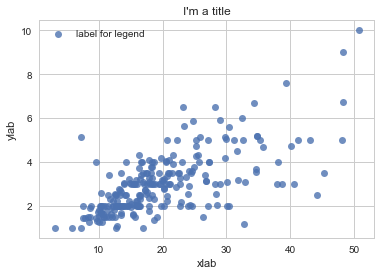

In [18]:
ax = sns.regplot(data=tips, x='total_bill', y='tip', label='label for legend', fit_reg=False)

ax.set(title="I'm a title", 
      xlabel='xlab',
      ylabel='ylab')

ax.legend(loc='upper left')


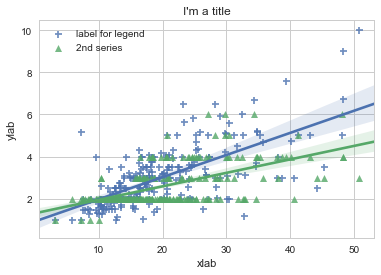

In [20]:
ax = sns.regplot(data=tips, x='total_bill', y='tip', label='label for legend', marker='+')
ax = sns.regplot(data=tips, x='total_bill', y='size', label='2nd series', marker='^')

ax.set(title="I'm a title", 
      xlabel='xlab',
      ylabel='ylab')

ax.legend(loc='upper left')


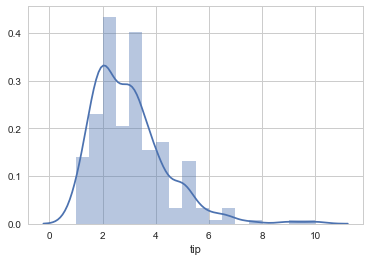

In [21]:
ax = sns.distplot(tips['tip'])

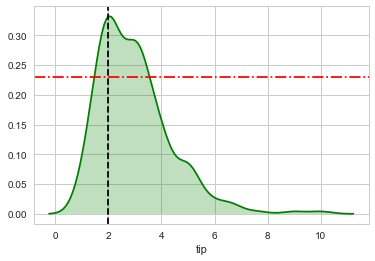

In [23]:
ax  = sns.distplot(tips['tip'], hist=False, color="g", kde_kws={"shade": True} )
plt.axvline(2, color="k", linestyle="--");
plt.axhline(.23, color="red", linestyle="-.");

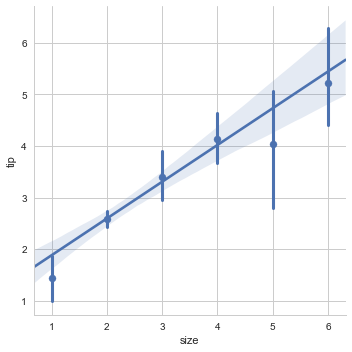

In [219]:
ax = sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

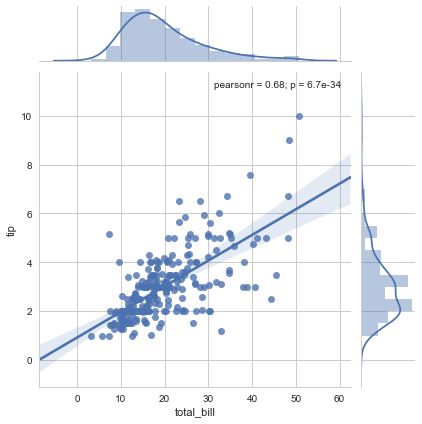

In [24]:
ax = sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Regplot

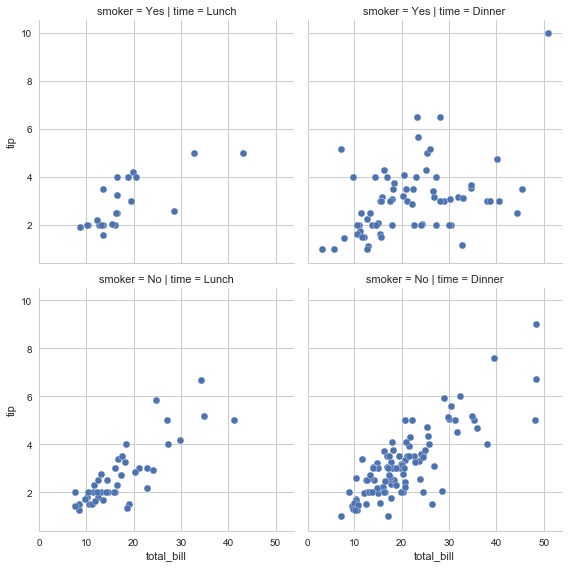

In [26]:
g = sns.FacetGrid(tips, col="time",  row="smoker", size=4)
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

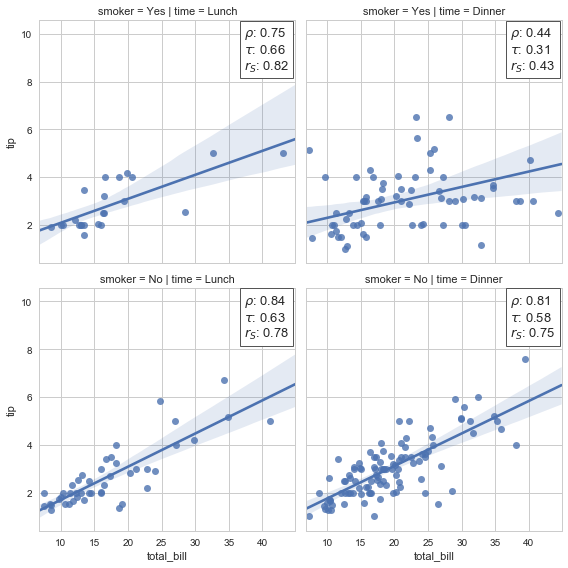

In [28]:
def personal_scatter (x, y, **kwargs):
    #print(x)
    #print(y)
    #assert False
    ax = sns.regplot(x, y)
    
    rho = np.round( sp.stats.pearsonr(x,y)[0]  ,2)
    tau = np.round( sp.stats.kendalltau(x,y)[0]  ,2)
    rs = np.round( sp.stats.spearmanr(x,y)[0]  ,2)
    
    ax.annotate (r"$\rho$: {} {}$\tau$: {} {}$r_S$: {}".format(rho, '\n', tau, '\n', rs), 
                 xy=(.8, .8), xycoords='axes fraction',  bbox=dict(lw = 1, ec = "#555555", fc = "white"),fontsize=13 ) 
    
    sns.despine(top=False,right=False,left=False,bottom=False)




g = sns.FacetGrid(tips, col="time",  row="smoker", size=4)
g = g.map(personal_scatter, "total_bill", "tip",)

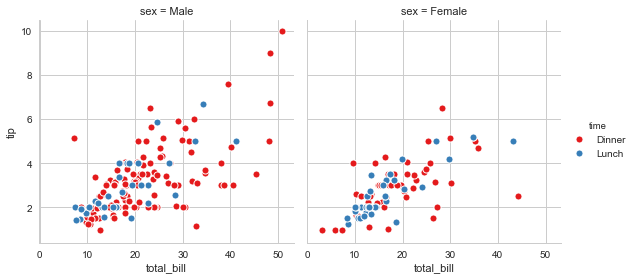

In [29]:
kws = dict(s=50, linewidth=.98, edgecolor="w")

g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1", hue_order=["Dinner", "Lunch"], size=4)

g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

### HEATMAP

In [30]:
flights_long = sns.load_dataset("flights")
display(flights_long.head())

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


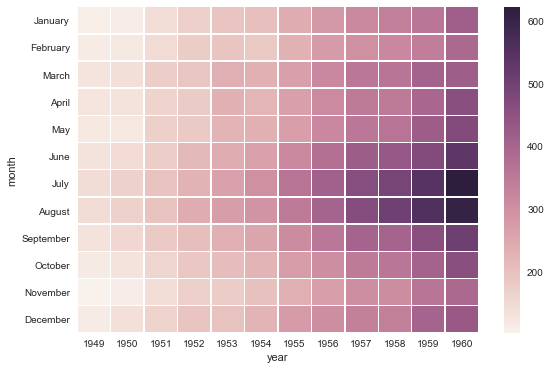

In [33]:
flights = flights_long.pivot("month", "year", "passengers")
display(flights.head())

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=False, fmt="d", linewidths=.5, ax=ax)

In [ ]:
### BOXPLOT

In [34]:
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


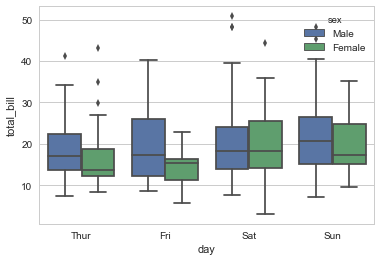

In [36]:
#sns.boxplot(x="day", y="total_bill", data=tips, palette="deep")
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="deep")

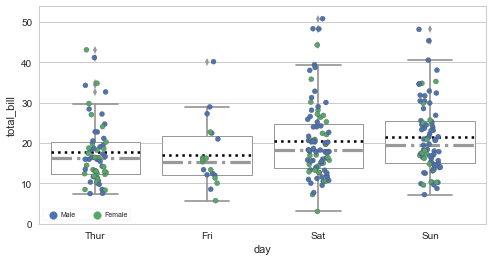

In [44]:

fig = plt.figure(figsize=(8,4))

jitter = True
alpha = .99
linewidth = .3
size = 5

       
meanp = dict(linestyle=':', linewidth=2.5, color='#000000')
medianp = dict(linestyle='-.', linewidth=3.2, color='#999999')
boxp = dict(linestyle='-', linewidth=1, )

ax = sns.boxplot(x="day", y="total_bill", data=tips,
                color='#FFFFFF',
                 showmeans=True, meanline = True, meanprops = meanp, medianprops = medianp, boxprops =  boxp,  )

        
ax = sns.stripplot(x="day", y="total_bill", hue='sex',
                       data=tips, palette='deep',
                       jitter=jitter, alpha=alpha, linewidth=linewidth, size=size, marker = 'o',  
                      )

ax.legend(loc='lower left', ncol=2, prop={'size': 7}, handletextpad=0.1, frameon=True)

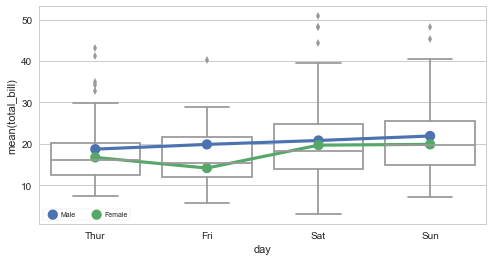

In [50]:

fig = plt.figure(figsize=(8,4))

jitter = .3
alpha = .99
linewidth = .3
size = 5

       
meanp = dict(linestyle=':', linewidth=5, color='#000000')
medianp = dict(linestyle='-', linewidth=2, color='#999999')
boxp = dict(linestyle='-', linewidth=1, )

ax = sns.boxplot(x="day", y="total_bill", data=tips,
                color='#FFFFFF')
                 #showmeans=True, meanline = True, meanprops = meanp, medianprops = medianp, boxprops =  boxp,  )

df_agg = tips.groupby(['day', 'sex']).agg('mean').reset_index()
#display(tips.head())
#display(df_agg.head(2))
    
ax = sns.pointplot(x="day", y="total_bill", hue='sex',
                       data=df_agg, palette='deep',
                       jitter=jitter, alpha=alpha, linewidth=linewidth, size=size, marker = 'o',  
                      )

ax.legend(loc='lower left', ncol=2, prop={'size': 7}, handletextpad=0.1, frameon=True)

In [49]:
### JOINTPLOT

In [52]:
df = sns.load_dataset("iris")
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
def personal_scatter (x, y, **kwargs):
    
    ax = sns.regplot(x, y)
    #ax = plt.cga()
    
    rho = np.round( sp.stats.pearsonr(x,y)[0]  ,2)
    tau = np.round( sp.stats.kendalltau(x,y)[0]  ,2)
    rs = np.round( sp.stats.spearmanr(x,y)[0]  ,2)
    
    ax.annotate (r"$\rho$: {} {}$\tau$: {} {}$r_S$: {}".format(rho, '\n', tau, '\n', rs), 
                 xy=(.8, .8), xycoords='axes fraction',  bbox=dict(lw = 1, ec = "#555555", fc = "white"),fontsize=13 ) 
    
    sns.despine(top=False,right=False,left=False,bottom=False)

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


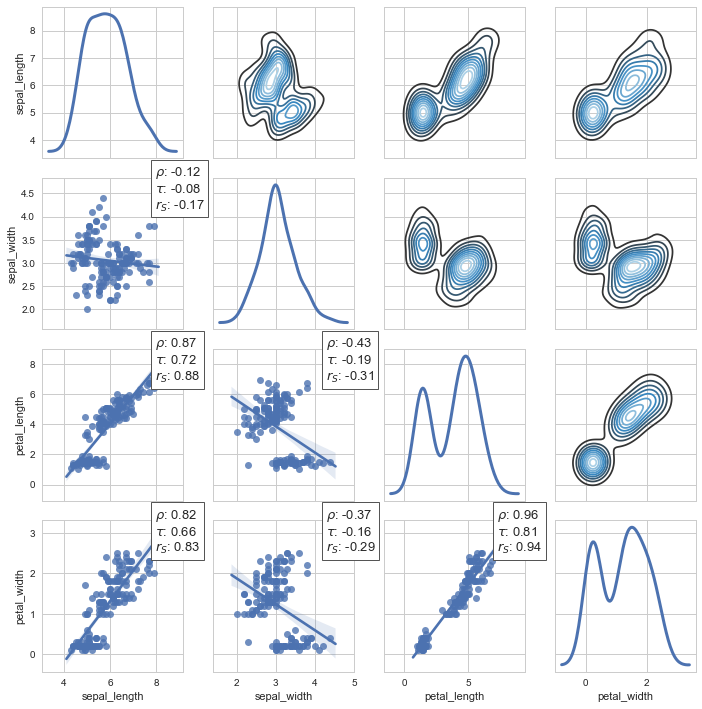

In [58]:
g = sns.PairGrid(df, diag_sharey=False)

#g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(personal_scatter,)

#g.map_upper(plt.scatter)
g.map_upper(sns.kdeplot, cmap="Blues_d")

g.map_diag(sns.kdeplot, lw=3)

In [ ]:
### PDF 

from matplotlib.backends.backend_pdf import PdfPages

pages = PdfPages("../plots/Correlation_BLS_Truth.pdf")

# plotting

pages.savefig(bbox_inches='tight')
pages.close()